In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('concrete.csv')

In [3]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [4]:
df.info()
# Total there are 1030 enteries and 9 columns - 8 are flot and one is an integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [ ]:
#Cement : measured in kg in a m3 mixture
● Blast : measured in kg in a m3 mixture
● Fly ash : measured in kg in a m3 mixture
● Water : measured in kg in a m3 mixture
● Superplasticizer : measured in kg in a m3 mixture
● Coarse Aggregate : measured in kg in a m3 mixture
● Fine Aggregate : measured in kg in a m3 mixture
● Age : day (1~365)
● Concrete compressive strength measured in MPa

In [6]:
# check if there are any null values
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [7]:
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].tail())
# Inference there are no null values or missing values

Empty DataFrame
Columns: []
Index: []


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [ ]:
# Checking the EDA 
1. Cement has a mean value of 281.167 , stdev 104.5, min value= 102,the 25 percentile =192.3, mid value 272.9 and max value=540
2. Slag has a mean value of 73.6, stdev 86.2, min value= 0,the  mid value 22 and max value=359.4
3. Ash has a mean value of 54.1, stdev 63.9, min value= 0,the max value= 200.1
4. water has a mean value of 181.5, stdev 21.3, min value= 121.8,mid value= 164.9 ,the max value= 247
5. superplastic has a mean value of 6.20, stdev 5.97, the mid value= 6.4 ,the max value= 32.2
6. coarseagg has a mean value of 972.9, stdev 77.7, the min value= 801 ,the max value= 32.2
6. fineagg has a mean value of 773.5, stdev 77.75, the min value=594 , the mid value =968 the max value= 992.6
7.age has a mean value of 45.6, stdev 63.16, the min value=1 ,the mid value = 28, the max value= 365
9.Strength has a mean value of 35.8, stdev 16.7, the min value= 2.33 ,the mid value = 34.45, the max value= 82.6

In [9]:
df.columns
# checking all the column names

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

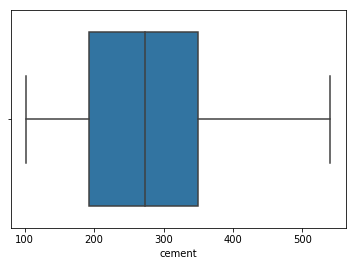

In [10]:
#Perfroming Univariate analysis 
# Checking for outliers with help of Box plot
sns.boxplot(df['cement'])

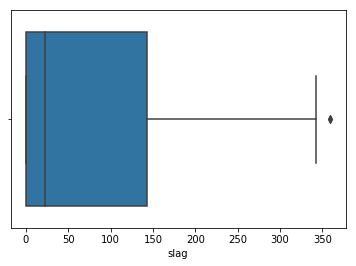

In [11]:
sns.boxplot(df['slag'])
# outliers observed on one side 

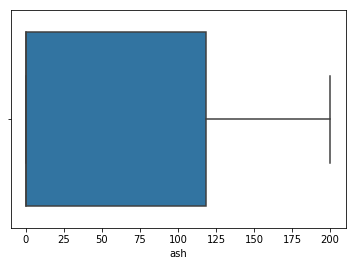

In [12]:
sns.boxplot(df['ash'])
# no outliers 

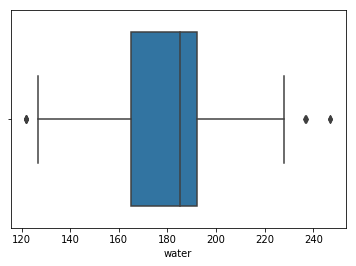

In [13]:
sns.boxplot(df['water'])
# outliers observed on both sides of data point

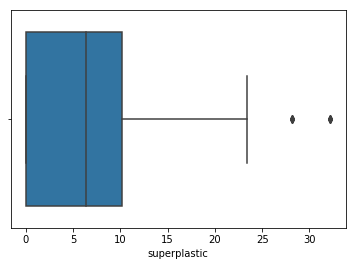

In [14]:
sns.boxplot(df['superplastic'])
# outliers observed on one side of data point

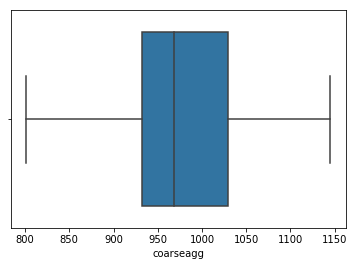

In [15]:
sns.boxplot(df['coarseagg'])
# no outliers observed

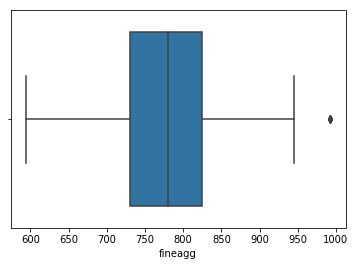

In [16]:
sns.boxplot(df['fineagg'])
 # outliers observed on one side of data point   

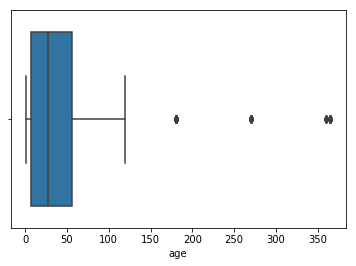

In [17]:
sns.boxplot(df['age'])
# too many outliers observed on one side of data point

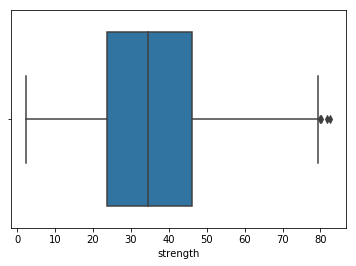

In [18]:
sns.boxplot(df['strength'])
# outliers observed on one side of data point

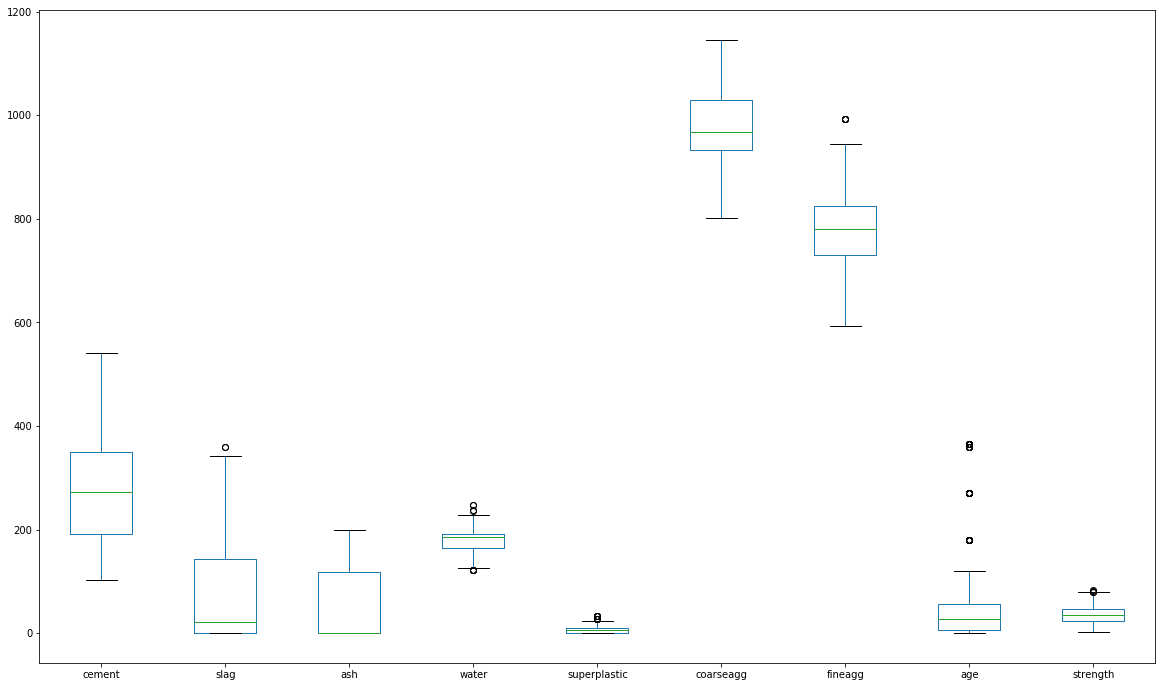

In [19]:
df.plot(kind='box', figsize=(20,12))
# Box plot with outliers

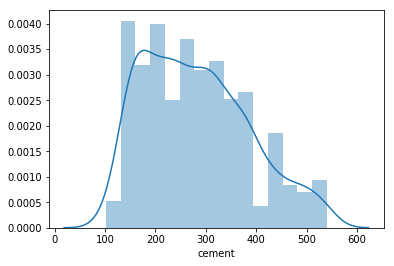

In [20]:
sns.distplot(df['cement'])
# Normal distribution plot - with slight positive skew
# Cement has a mean value of 281.167 , stdev 104.5, min value= 102,the 25 percentile =192.3, mid value 272.9 and max value=540

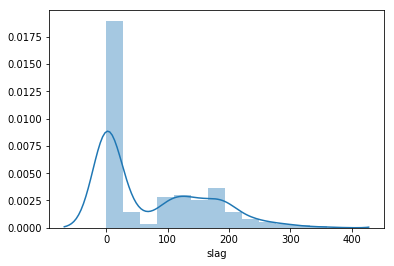

In [21]:
sns.distplot(df['slag'])
#  distribution plot - with heavy positive skew
#Slag has a mean value of 73.6, stdev 86.2, min value= 0,the  mid value 22 and max value=359.4

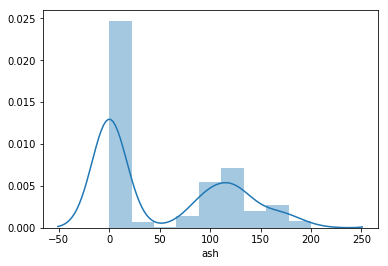

In [22]:
sns.distplot(df['ash'])
#  distribution plot - with heavy positive skew
#Ash has a mean value of 54.1, stdev 63.9, min value= 0,the max value= 200.1

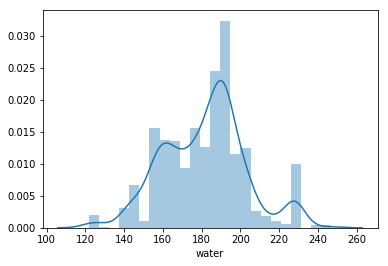

In [23]:
sns.distplot(df['water'])
#  distribution plot - with slight positive skew
# water has a mean value of 181.5, stdev 21.3, min value= 121.8,mid value= 164.9 ,the max value= 247

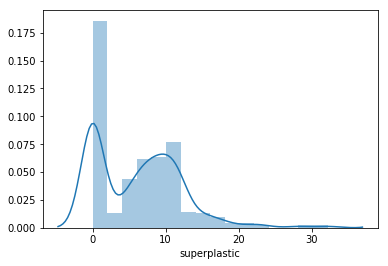

In [24]:
sns.distplot(df['superplastic'])
# distribution plot - with heavy positive skew
# superplastic has a mean value of 6.20, stdev 5.97, the mid value= 6.4 ,the max value= 32.2

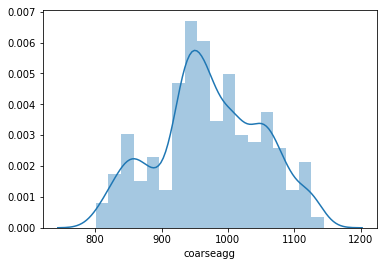

In [25]:
sns.distplot(df['coarseagg'])
# distribution plot - withs light positive skew
#coarseagg has a mean value of 972.9, stdev 77.7, the min value= 801 ,the max value= 32.2

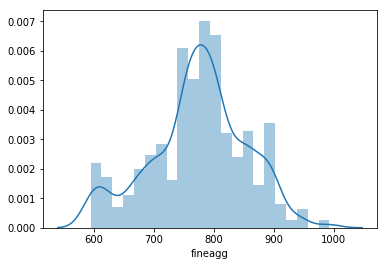

In [26]:
sns.distplot(df['fineagg'])
# distribution plot - has no or slight positive skew
#fineagg has a mean value of 773.5, stdev 77.75, the min value=594 , the mid value =968 the max value= 992.6

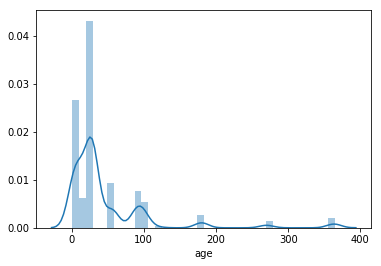

In [27]:
sns.distplot(df['age'])
# distribution plot - has too many outliers and havey positive skew
# age has a mean value of 45.6, stdev 63.16, the min value=1 ,the mid value = 28, the max value= 365

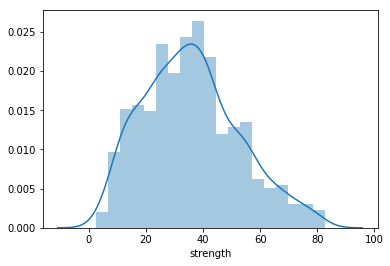

In [28]:
sns.distplot(df['strength'])
# distribution plot - has slight positive skew
#Strength has a mean value of 35.8, stdev 16.7, the min value= 2.33 ,the mid value = 34.45, the max value= 82.6

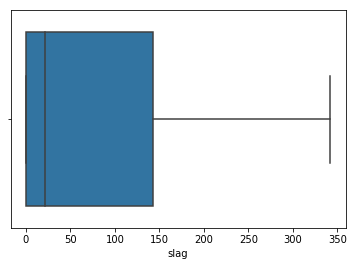

In [29]:
# outlier data points being replaced with median values 
q1=df['slag'].quantile(.25)
q3=df['slag'].quantile(.75)
iqr=q3-q1
low=q1-1.5*iqr
high= q3+1.5*iqr

df.loc[(df['slag'] <low) |(df['slag']>high), 'slag']=df['slag'].median()
sns.boxplot(df['slag'])
# No outliers observed

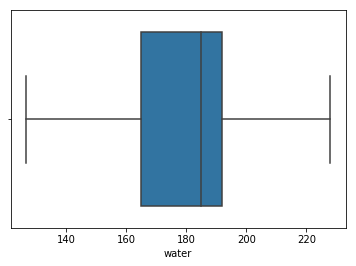

In [30]:
# outlier data points being replaced with median values 
q1=df['water'].quantile(.25)
q3=df['water'].quantile(.75)
iqr=q3-q1
low=q1-1.5*iqr
high= q3+1.5*iqr

df.loc[(df['water'] <low) |(df['water']>high), 'water']=df['water'].median()
sns.boxplot(df['water'])
# No outliers observed

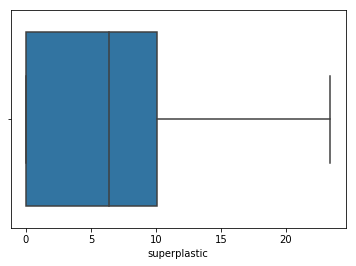

In [31]:
# outlier data points being replaced with median values
q1=df['superplastic'].quantile(.25)
q3=df['superplastic'].quantile(.75)
iqr=q3-q1
low=q1-1.5*iqr
high= q3+1.5*iqr

df.loc[(df['superplastic'] <low) |(df['superplastic']>high), 'superplastic']=df['superplastic'].median()
sns.boxplot(df['superplastic'])
# No outliers observed

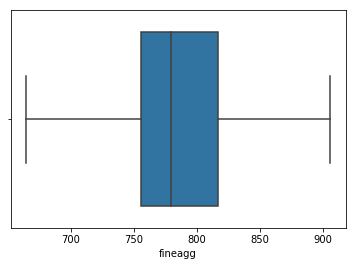

In [37]:
# outlier data points being replaced with median values
q1=df['fineagg'].quantile(.25)
q3=df['fineagg'].quantile(.75)
iqr=q3-q1
low=q1-1.5*iqr
high= q3+1.5*iqr

df.loc[(df['fineagg']<low)|(df['fineagg']>high), 'fineagg']=df['fineagg'].median()
sns.boxplot(df['fineagg'])
# No outliers observed

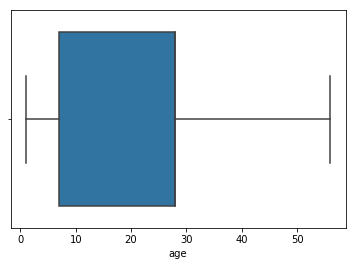

In [39]:
# outlier data points being replaced with median values
q1=df['age'].quantile(.25)
q3=df['age'].quantile(.75)
iqr=q3-q1
low=q1-1.5*iqr
high= q3+1.5*iqr

df.loc[(df['age'] <low)|(df['age']>high), 'age']=df['age'].median()
sns.boxplot(df['age'])
# No outliers observed

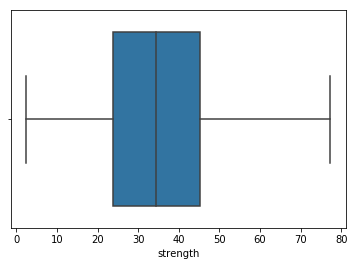

In [42]:
# outlier data points being replaced with median values
q1=df['strength'].quantile(.25)
q3=df['strength'].quantile(.75)
iqr=q3-q1
low=q1-1.5*iqr
high= q3+1.5*iqr

df.loc[(df['strength'] <low)|(df['strength']>high),'strength']=df['strength'].median()
sns.boxplot(df['strength'])
# No outliers observed

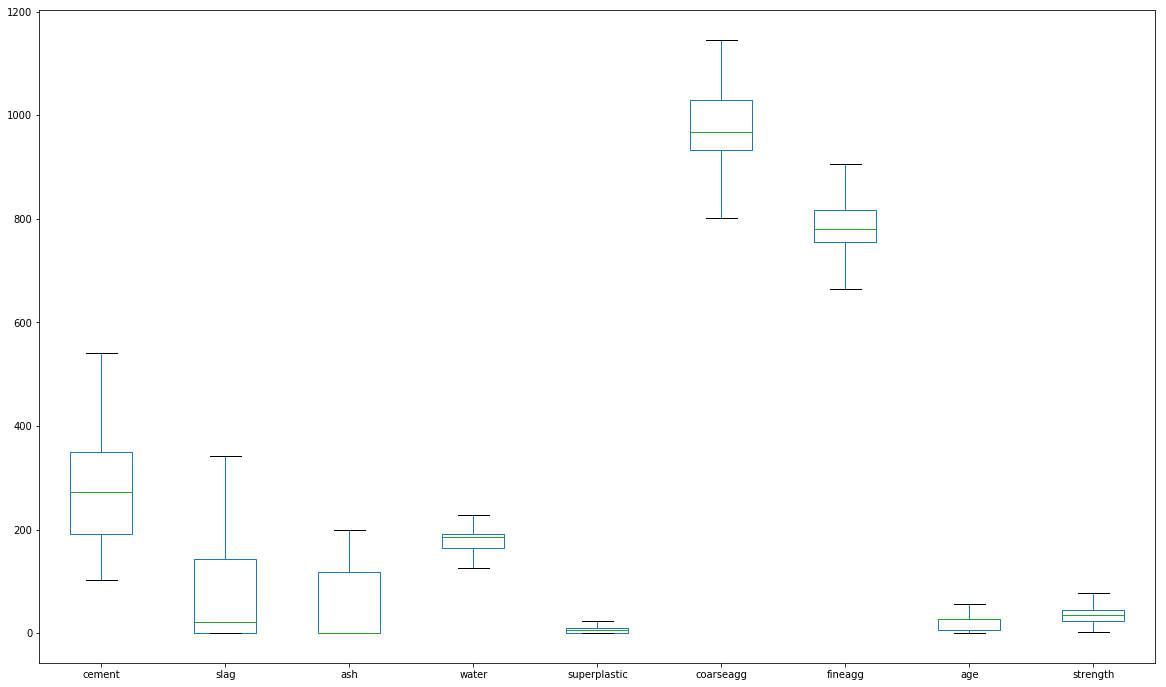

In [43]:
df.plot(kind='box', figsize=(20,12))
# Box plot with no outliers 

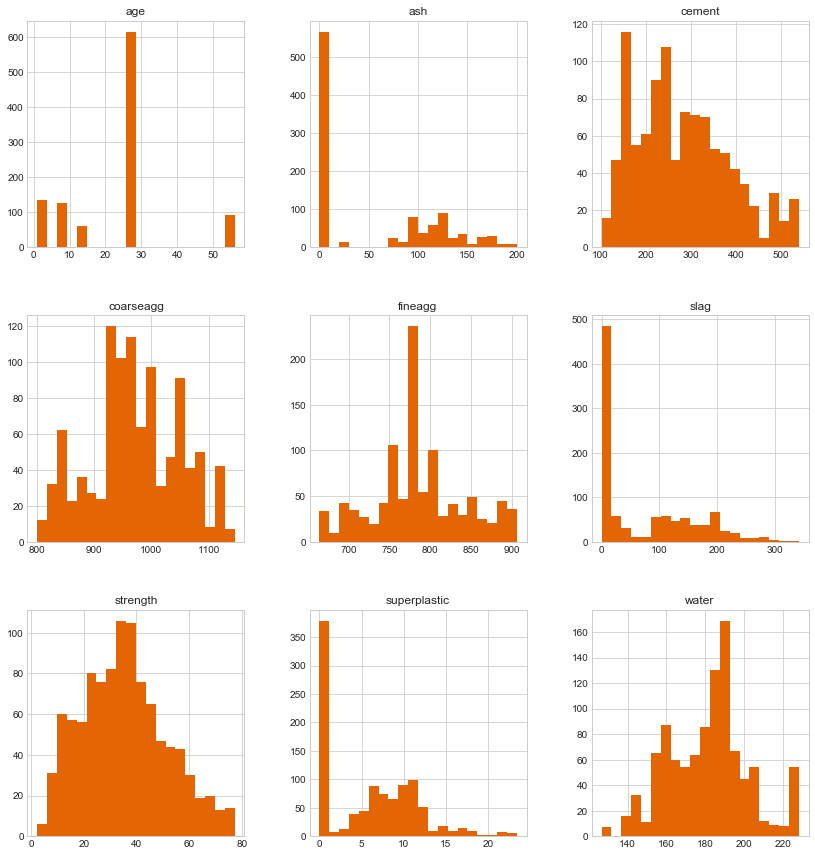

In [44]:
# Let's see how the numeric data is distributed.Histogram of each variable
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,15), color='#E46504')
plt.show()

cement Distribution  Axes(0.125,0.125;0.775x0.755)
slag Distribution  Axes(0.125,0.125;0.775x0.755)
ash Distribution  Axes(0.125,0.125;0.775x0.755)
water Distribution  Axes(0.125,0.125;0.775x0.755)
superplastic Distribution  Axes(0.125,0.125;0.775x0.755)
coarseagg Distribution  Axes(0.125,0.125;0.775x0.755)
fineagg Distribution  Axes(0.125,0.125;0.775x0.755)
age Distribution  Axes(0.125,0.125;0.775x0.755)
strength Distribution  Axes(0.125,0.125;0.775x0.755)


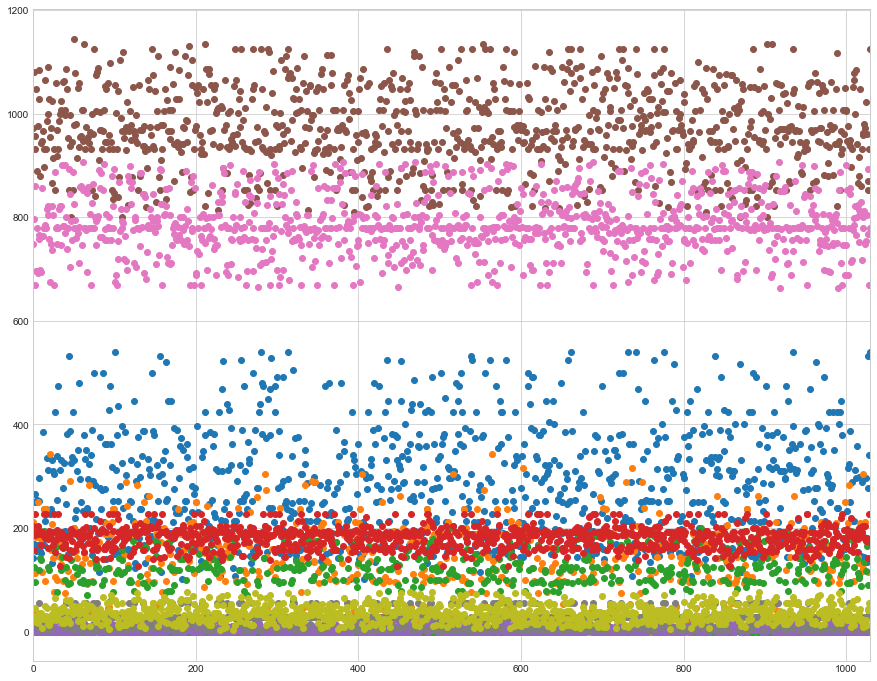

In [45]:
# checking for distributions of vaious attributes
for coloumn in df.columns:
    print(coloumn + ' Distribution ', df[coloumn].plot( style='o', figsize = (15,12)))

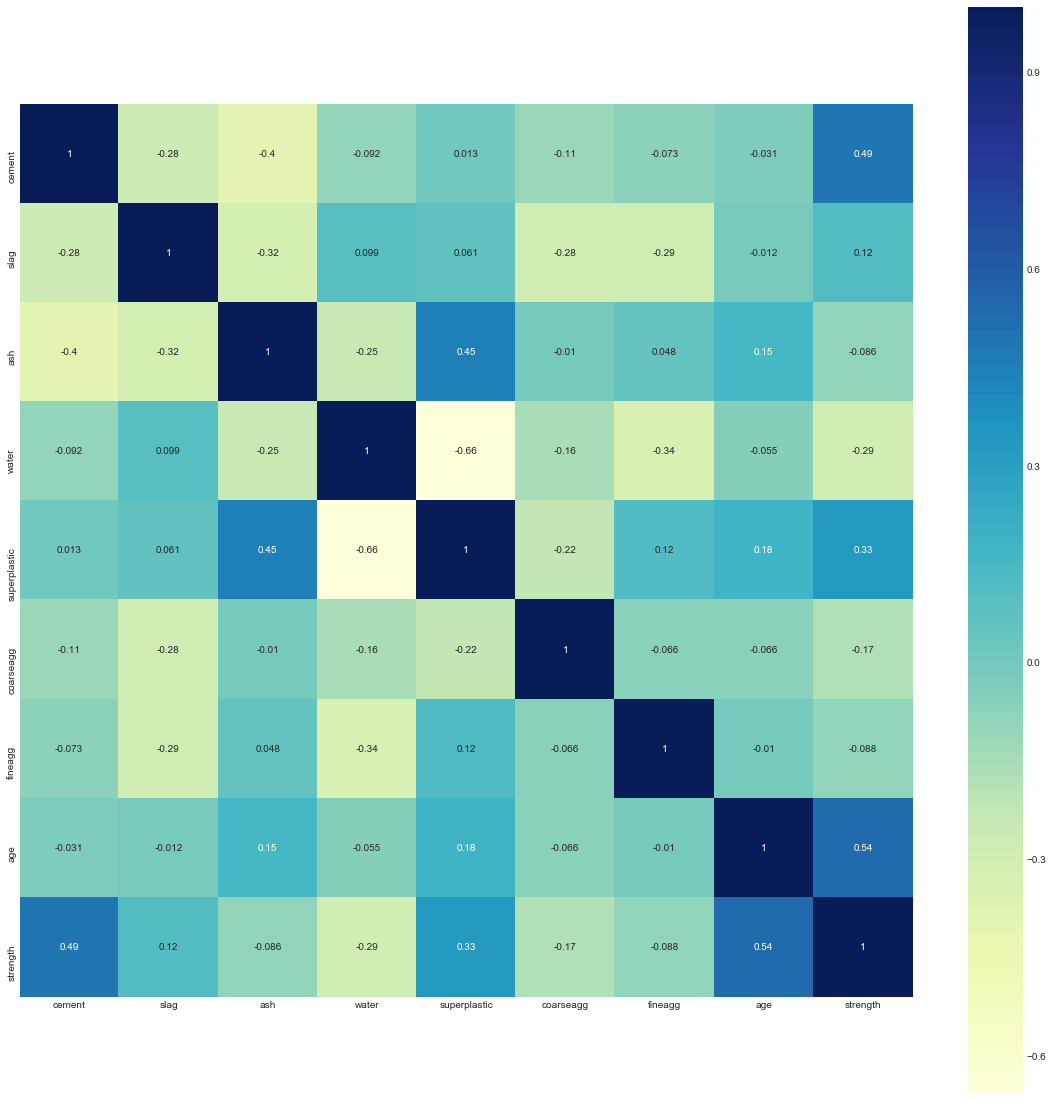

In [46]:
# checking for correlation between input and output variable
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrmat, vmax=1.0,cmap="YlGnBu",annot=True,square=True);
# the correlation matrix indicates most there not much correlation observed the hight is a negative correlation of (-0.66) between 
# water and superplastic

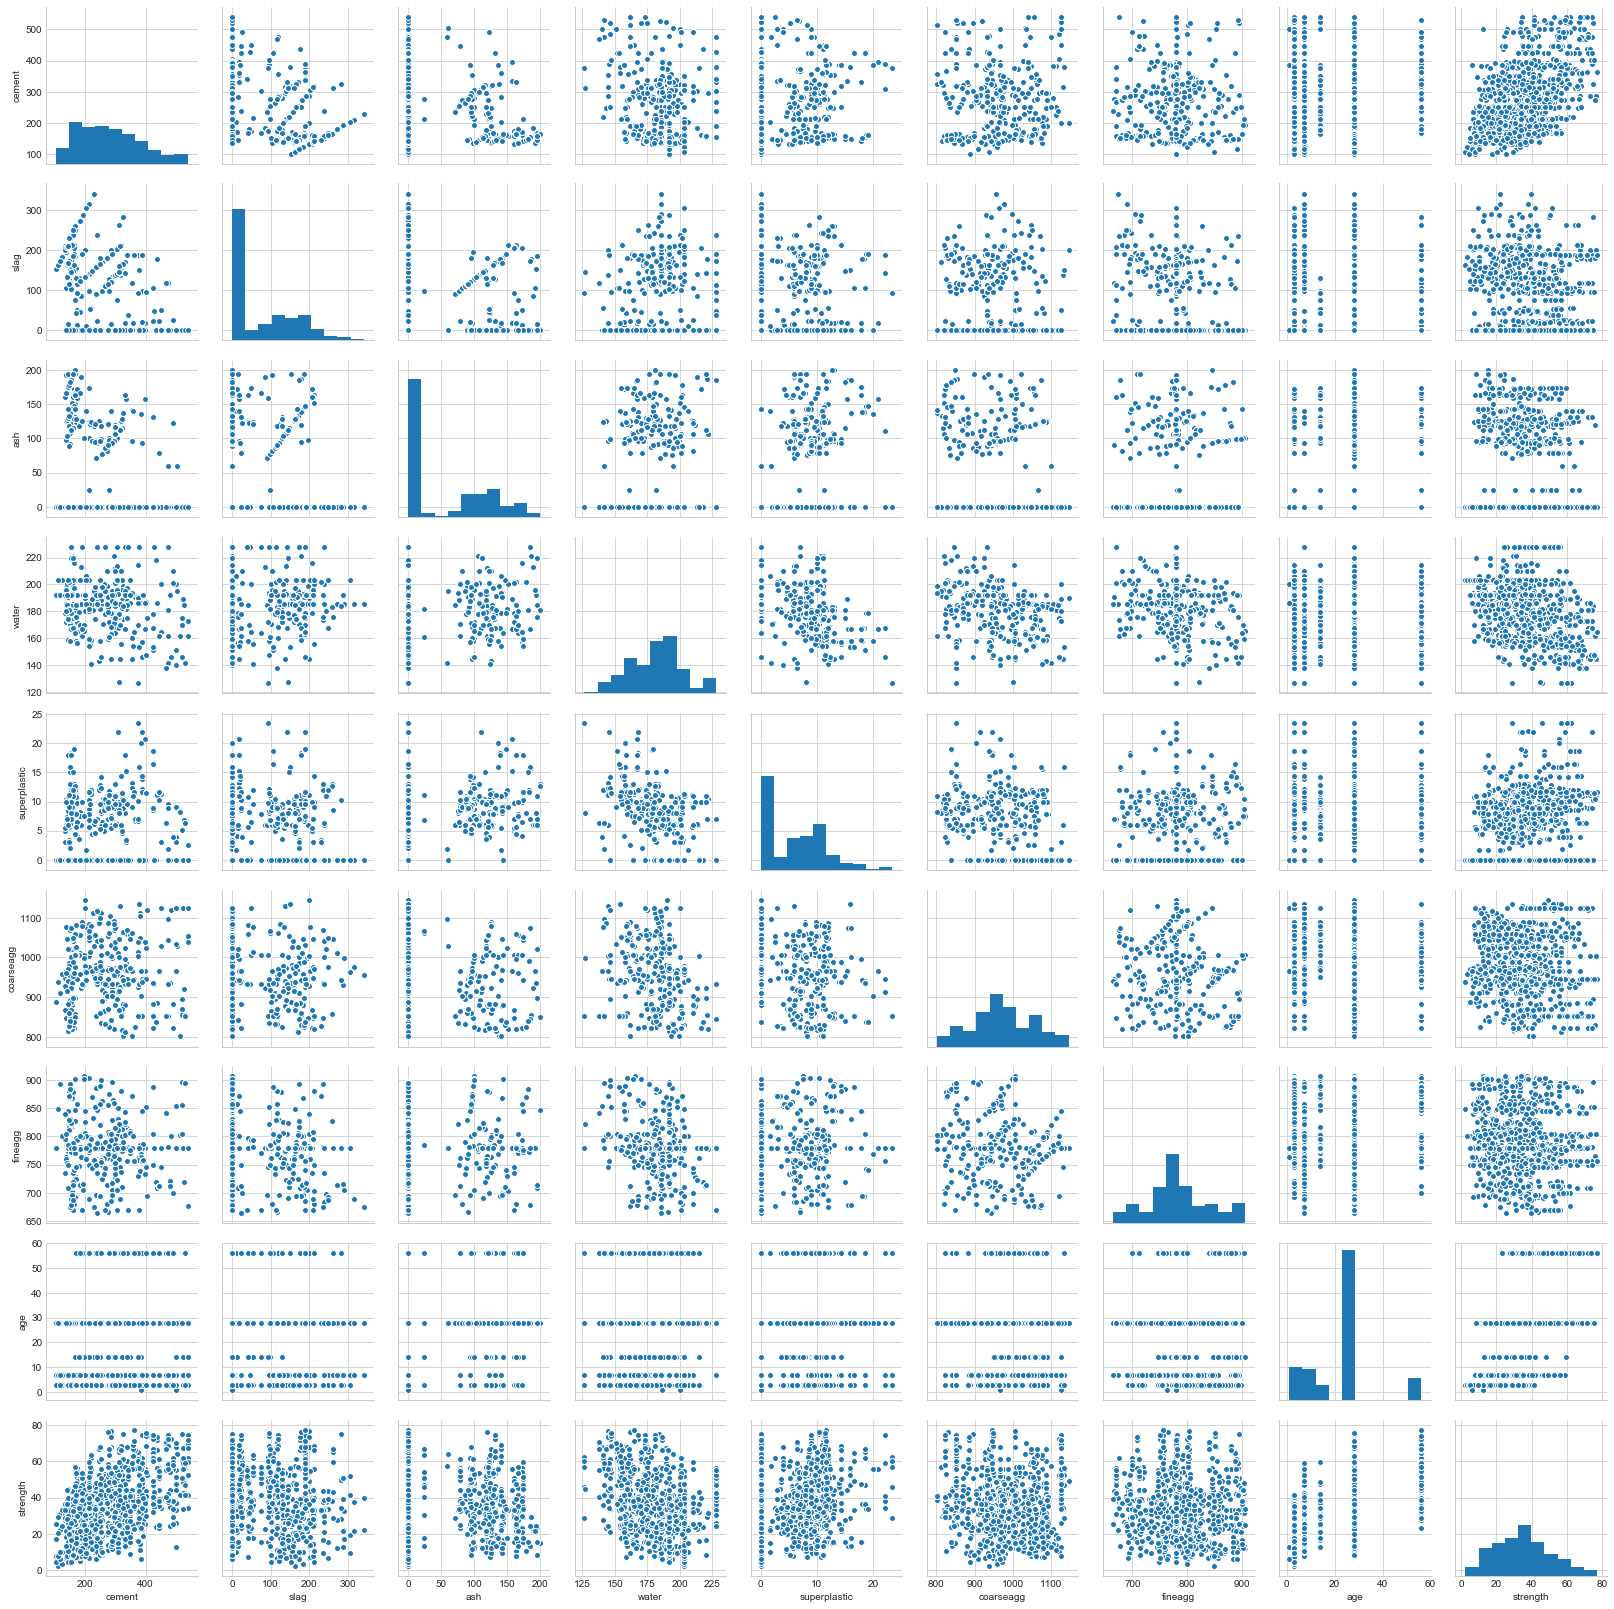

In [47]:
# Multivariate analysis
# plotting the pairplot between various attributes
sns.pairplot(df)

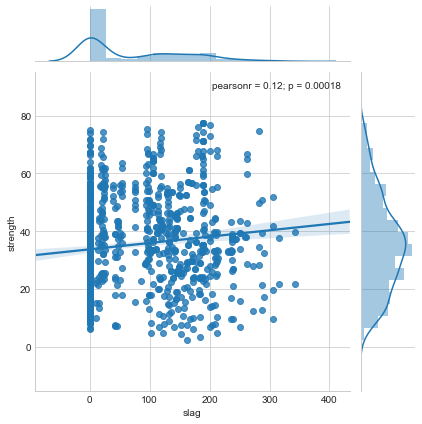

In [48]:
# finding the correlation between slag and strength = the pearson correlation = 0.13 
sns.jointplot(x=df["slag"], y=df["strength"], kind='regression')


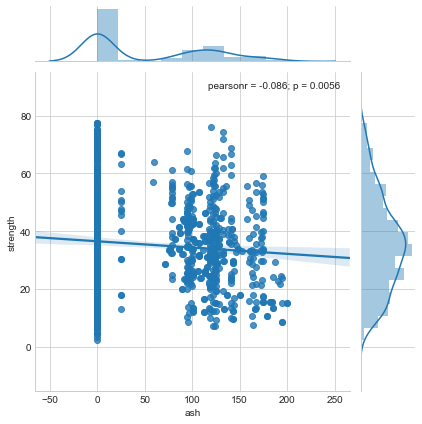

In [49]:
sns.jointplot(x=df["ash"], y=df["strength"], kind='regression')
# finding the correlation between ash and output strength = the pearson correlation = -0.98

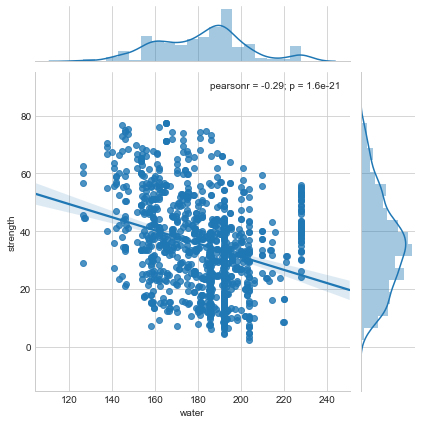

In [50]:
sns.jointplot(x=df["water"], y=df["strength"], kind='regression')
# finding the correlation between water and output strength = the pearson correlation = -0.3

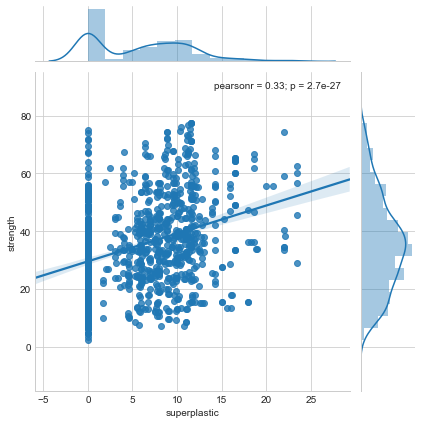

In [51]:
sns.jointplot(x=df["superplastic"], y=df["strength"], kind='regression')
# finding the correlation between superplastic and output strength = the pearson correlation = 0.34

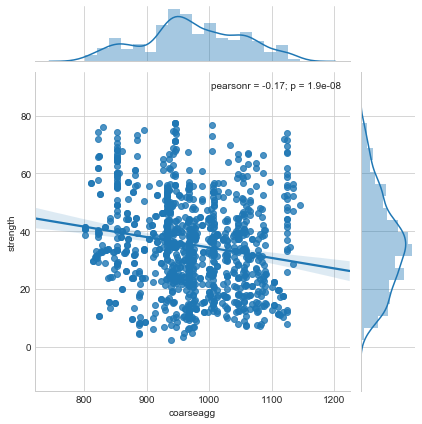

In [52]:
sns.jointplot(x=df["coarseagg"], y=df["strength"], kind='regression')
# finding the correlation between coarseagg and output strength = the pearson correlation = -.17

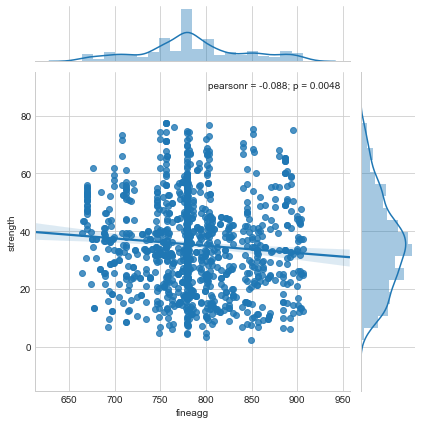

In [53]:
sns.jointplot(x=df["fineagg"], y=df["strength"], kind='regression')
# finding the correlation between fineagg and output strength = the pearson correlation = -.18

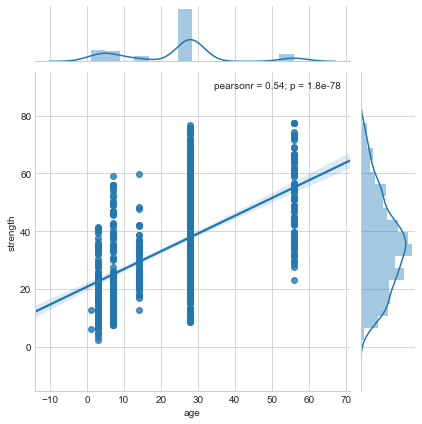

In [54]:
sns.jointplot(x=df["age"], y=df["strength"], kind='regression')
# finding the correlation between age and output strength = the pearson correlation = 0.5

In [55]:
# identifying X and Y variable and datapoints
X= df.drop('strength',axis=1)
y= df['strength']

In [56]:
# splitting the data to 70:30
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3 , random_state=101)

In [57]:
#Scaling the features Feature Engineering techniques
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),
                              columns = X_train.columns)
X_train_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-0.667045,-0.853397,0.691225,-1.045420,0.760674,0.441713,2.057729,2.298819
1,-1.726361,0.920859,-0.866216,0.486626,-1.113800,-1.076129,-0.111833,-1.476203
2,0.481346,0.799097,-0.866216,2.178456,-1.113800,-0.491344,-0.112705,0.304468
3,-1.038667,0.229711,1.614211,-0.439181,0.634508,0.485897,-0.684974,0.304468
4,-0.428555,1.900759,-0.866216,2.178456,-1.113800,-0.491344,-0.112705,0.304468


In [58]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, X, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, X, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, X, y, cv=cv, scoring='r2').mean())

In [59]:
# Explore for gaussians and creating the model ,Decide on complexity of the model, should it 
#be simple linear mode in terms of parameters or would a quadratic or higher degree help 
# Algorithms that you think will be suitable for this project 

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression','K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train_scaled, y_train)

In [60]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,R Squared,RMSE
0,Linear Regression,0.646700,9.285741
1,K Neighbors Regressor,0.701478,8.531730
2,Decision Tree Regressor,0.678357,8.828446
3,Random Forest Regressor,0.777746,7.216529
4,Gradient Boosting Regressor,0.797780,7.033214
5,Adaboost Regressor,0.688488,8.748468


In [ ]:
# Based on various models and comparing the R Square and RMSE we find that Gradient Boosting regressor is the best fit wit
# R Square =79.8% and RMSE =7.03

In [61]:
#tuning this base model
GradientBoostingRegressor()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [63]:
#tuning for number of trees
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':range(20,1001,10),
              'max_depth':[10], #range(5,16,2), 
              'min_samples_split':[100], #range(200,1001,200), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid =param_grid, scoring='r2', 
                   cv=cv).fit(X_train_scaled, y_train)
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=100, min_weight_fraction_leaf=0.0,
             n_estimators=60, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)
R Squared: 0.808180706076


In [64]:
#tuning the tree specific parameters
param_grid = {'n_estimators': [230],
              'max_depth': range(10,31,2), 
              'min_samples_split': range(50,501,10), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(X_train_scaled, y_train)
print(clf.best_estimator_) 
rsqr="R Squared:",clf.best_score_
print(rsqr)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=12, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=280, min_weight_fraction_leaf=0.0,
             n_estimators=230, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)
('R Squared:', 0.80389092429759856)


In [68]:
#now increasing number of trees and decreasing learning rate proportionally
clf = GradientBoostingRegressor(random_state=1, max_depth=20, 
                                min_samples_split=170, n_estimators=230*2, 
                                learning_rate=0.2/2)

print("R Squared:",cross_val_score(clf, X_train_scaled, y_train, cv=cv, scoring='r2').mean())

R Squared: 0.790185546726


In [ ]:
#R2 = 79%

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [ ]:
# #Applying this model on test data to find the R^2 and RSME

In [71]:
#applying this model on test data
#  Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit c. 
# Model performance range at 95% confidence level 
x_test_scaled = pd.DataFrame(scaler.transform(X_test),
                             columns = X_test.columns)
clf = GradientBoostingRegressor(learning_rate=0.2/2, max_depth=20,
                                min_samples_split=170, n_estimators=230*2, 
                                random_state=1).fit(X_train_scaled, y_train)


In [73]:
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clf.predict(x_test_scaled))))
print("Test R^2: ", r2_score(y_test, clf.predict(x_test_scaled))) 


Test RMSE:  6.30707602068
Test R^2:  0.86108884624


In [ ]:
# Inference :-The R^2 for test data = 86.1% and RMSE = 6.36